In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import convolve

# 1. Chargement et Exploration des Données
print("1. CHARGEMENT ET EXPLORATION DES DONNÉES")
# Chargement du dataset
df = pd.read_csv('DATASET/AAPL_1D_01012007_12072023.csv')

# Conversion de la colonne time en datetime
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Affichage des informations basiques
print("\nInformations sur le dataset:")
print(df.info())
print("\nValeurs manquantes:")
print(df.isnull().sum())
print("\nStatistiques descriptives:")
print(df.describe())

1. CHARGEMENT ET EXPLORATION DES DONNÉES

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4159 entries, 1970-01-01 00:00:01.167800400 to 1970-01-01 00:00:01.689134400
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   transactions  4159 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 259.9 KB
None

Valeurs manquantes:
volume          0
vwap            0
open            0
close           0
high            0
low             0
transactions    0
dtype: int64

Statistiques descriptives:
             volume         vwap         open        close         high  \
count  4.159000e+03  4159.000000  4159.000000  4159.000000  


2. VISUALISATION DES DONNÉES


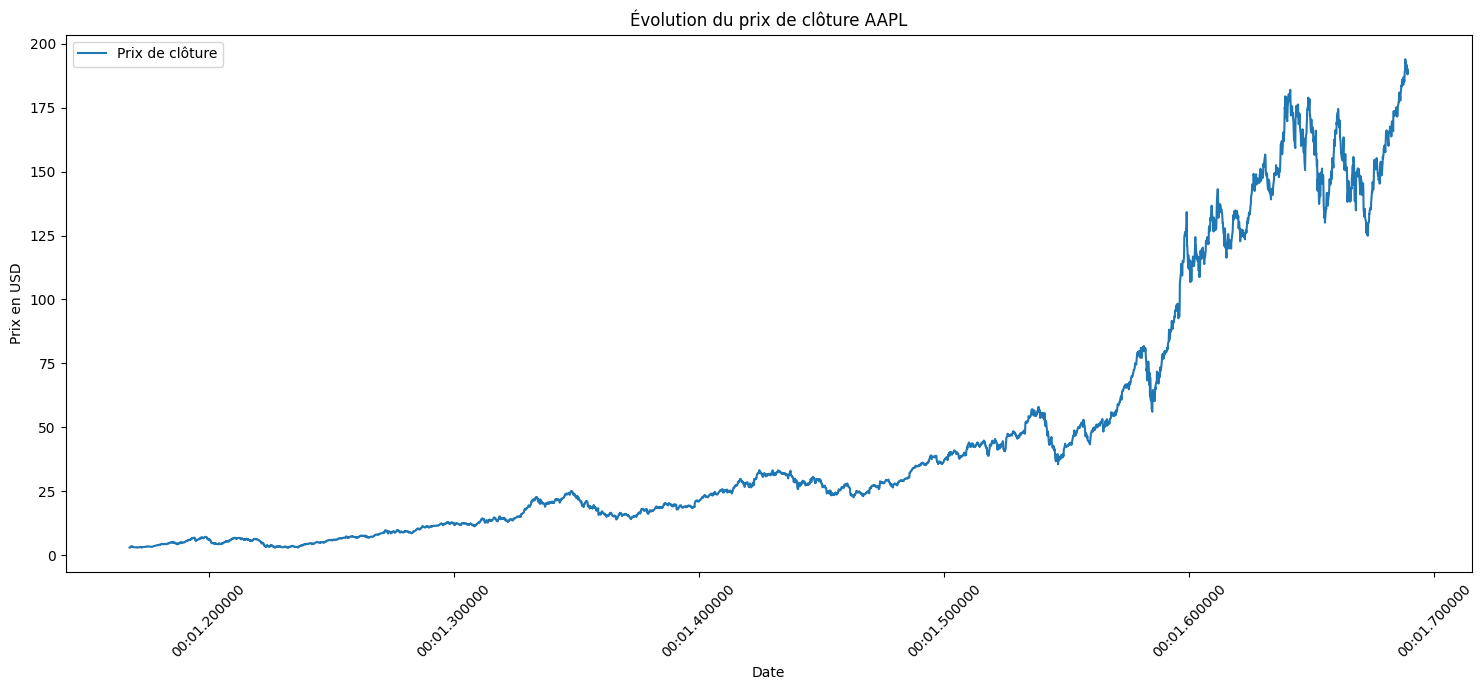

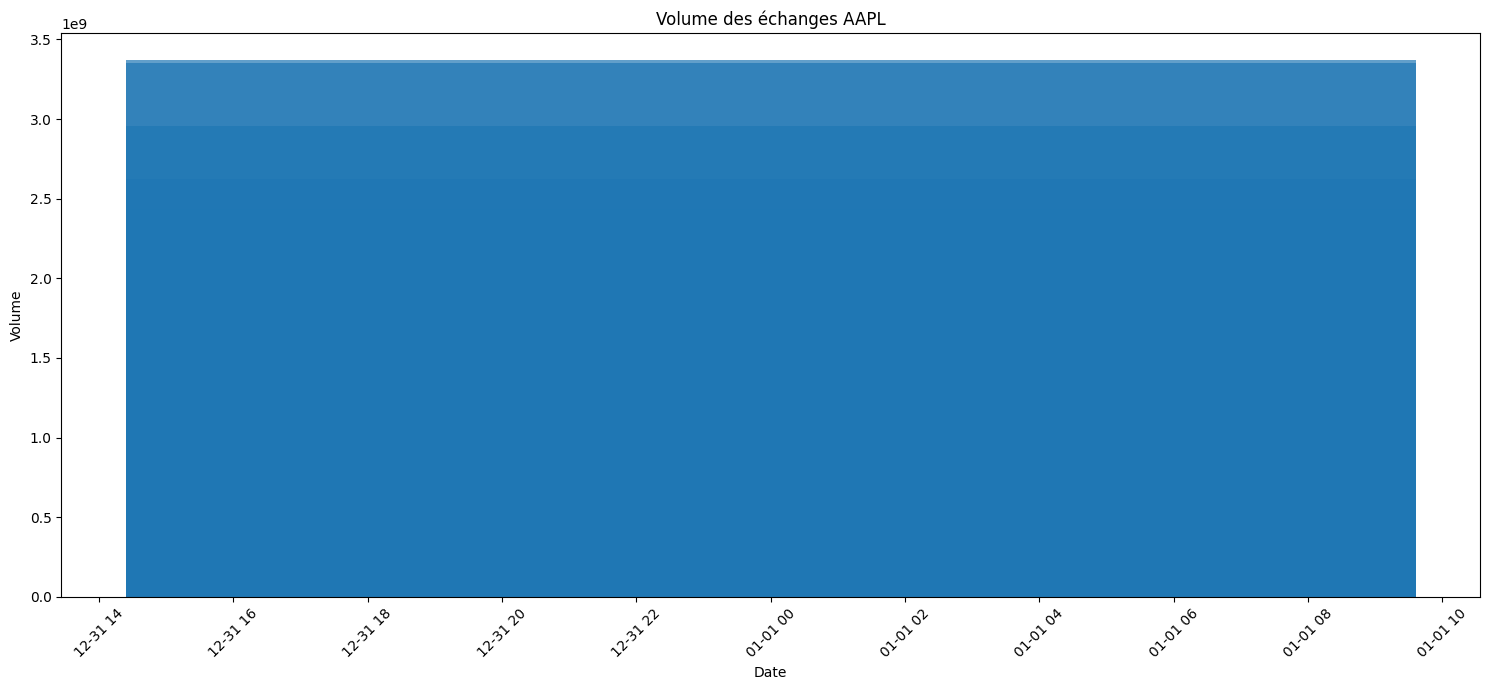

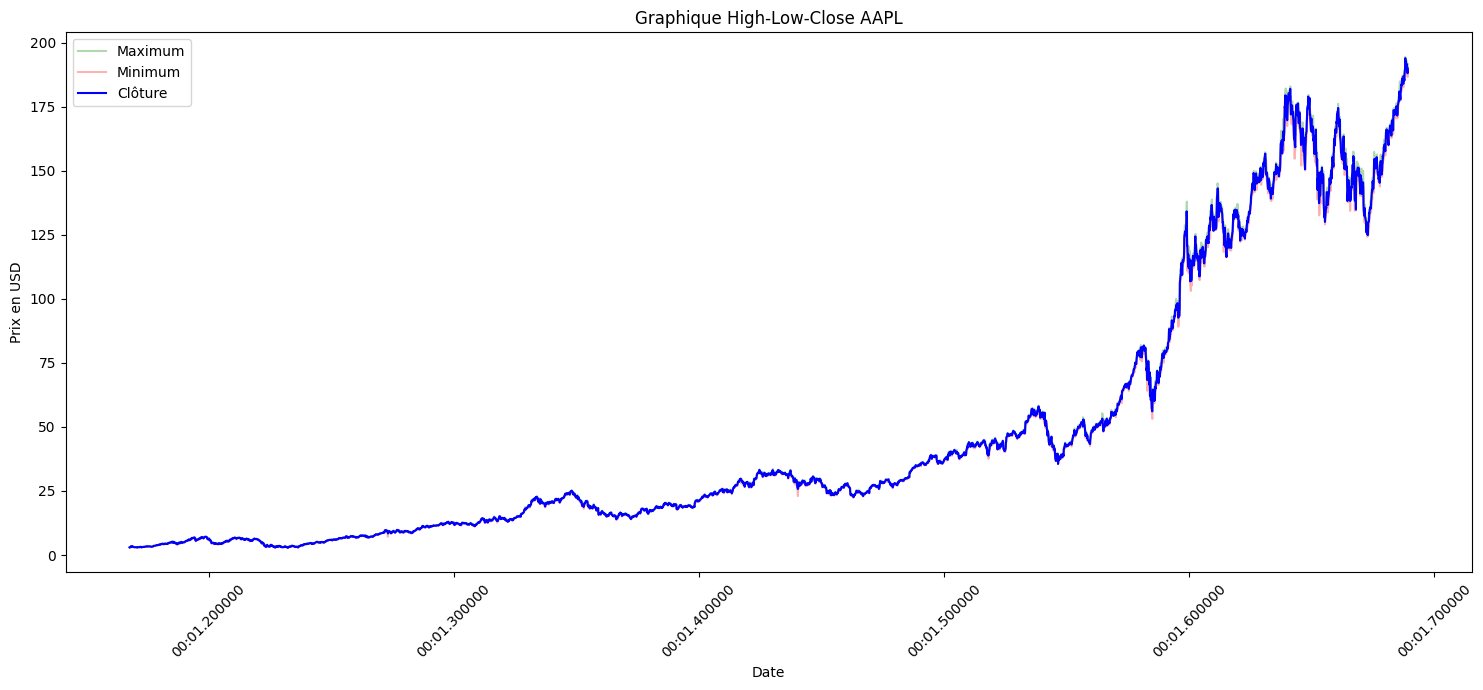

In [6]:
# 2. VISUALISATION DES DONNÉES
print("\n2. VISUALISATION DES DONNÉES")

# Graphique des prix de clôture
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['close'], label='Prix de clôture')
plt.title('Évolution du prix de clôture AAPL')
plt.xlabel('Date')
plt.ylabel('Prix en USD')  # Évite l'utilisation du symbole \$
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique du volume
plt.figure(figsize=(15, 7))
plt.bar(df.index, df['volume'], alpha=0.7)
plt.title('Volume des échanges AAPL')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Création d'un graphique en chandelier simplifié
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['high'], 'g-', alpha=0.3, label='Maximum')
plt.plot(df.index, df['low'], 'r-', alpha=0.3, label='Minimum')
plt.fill_between(df.index, df['high'], df['low'], alpha=0.1)
plt.plot(df.index, df['close'], 'b-', label='Clôture')
plt.title('Graphique High-Low-Close AAPL')
plt.xlabel('Date')
plt.ylabel('Prix en USD')  # Évite l'utilisation du symbole \$
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




3. ANALYSE STATISTIQUE


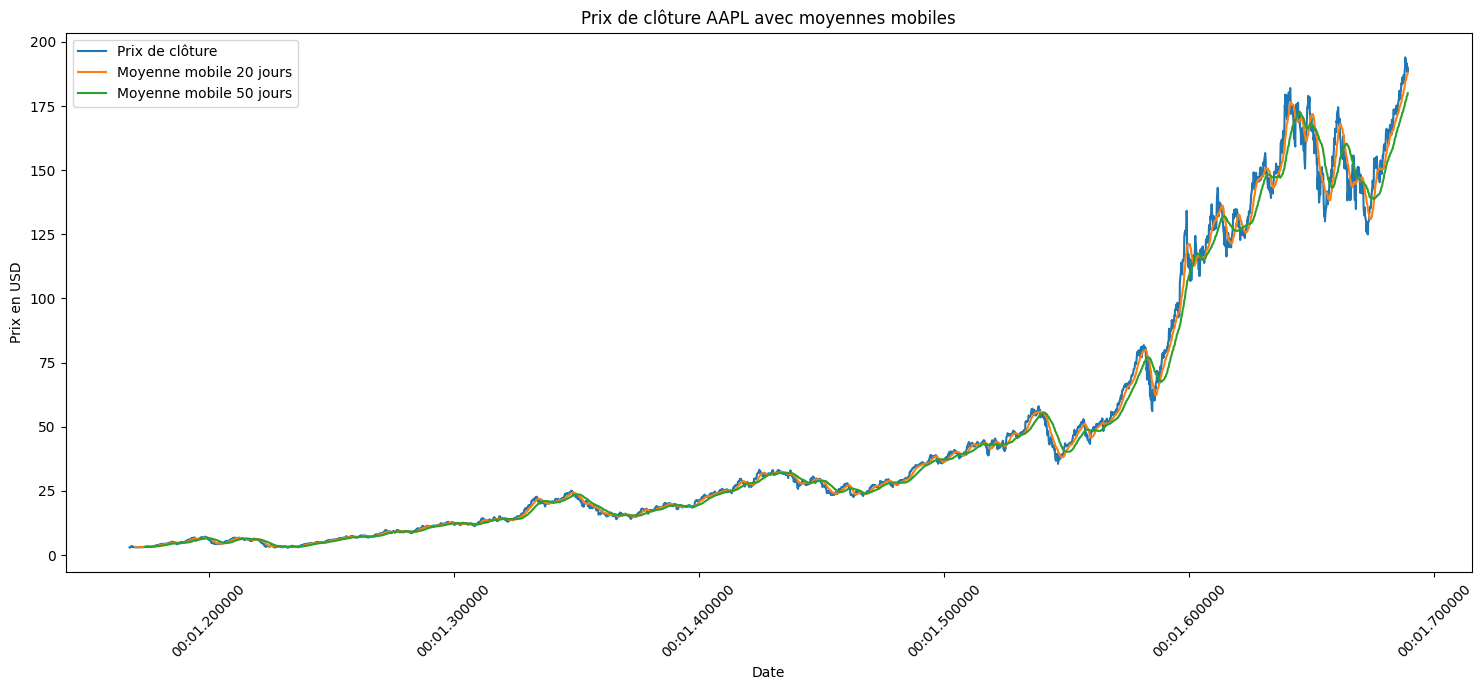


Statistiques descriptives des prix de clôture:
count    4159.000000
mean       46.396058
std        50.293482
min         2.792900
25%        11.947150
50%        25.825000
75%        52.231250
max       193.970000
Name: close, dtype: float64

Volatilité quotidienne moyenne: 0.020209330519760208

Distribution des tendances:
trend
Haussière    2709
Baissière    1450
Name: count, dtype: int64

Variation quotidienne moyenne: 0.12034197272635055 %


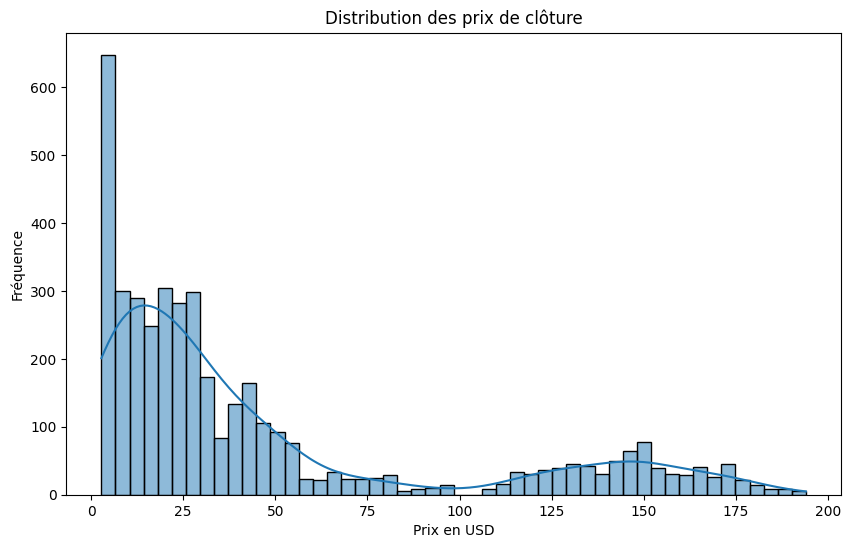

In [8]:
# 3. ANALYSE STATISTIQUE
print("\n3. ANALYSE STATISTIQUE")

# Calcul de la moyenne mobile sur 20 jours
df['MA20'] = df['close'].rolling(window=20).mean()
df['MA50'] = df['close'].rolling(window=50).mean()

# Graphique avec moyennes mobiles
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['close'], label='Prix de clôture')
plt.plot(df.index, df['MA20'], label='Moyenne mobile 20 jours')
plt.plot(df.index, df['MA50'], label='Moyenne mobile 50 jours')
plt.title('Prix de clôture AAPL avec moyennes mobiles')
plt.xlabel('Date')
plt.ylabel('Prix en USD')  # Correction de la séquence d'échappement
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ajout d'analyses statistiques supplémentaires
print("\nStatistiques descriptives des prix de clôture:")
print(df['close'].describe())

# Calcul de la volatilité quotidienne
df['daily_volatility'] = df['close'].pct_change().std()
print("\nVolatilité quotidienne moyenne:", df['daily_volatility'].mean())

# Analyse des tendances
df['trend'] = np.where(df['MA20'] > df['MA50'], 'Haussière', 'Baissière')
trend_distribution = df['trend'].value_counts()
print("\nDistribution des tendances:")
print(trend_distribution)

# Calcul des variations moyennes
df['daily_change'] = df['close'].pct_change()
print("\nVariation quotidienne moyenne:", df['daily_change'].mean() * 100, "%")

# Visualisation de la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution des prix de clôture')
plt.xlabel('Prix en USD')
plt.ylabel('Fréquence')
plt.show()



4. TESTS D'HYPOTHÈSES

Taille des échantillons:
Nombre d'observations 2007-2015: 2211
Nombre d'observations 2016-2023: 1948

T-test entre les deux périodes:
T-statistique: -61.4783
P-value: 0.0000

Statistiques descriptives:

Période 2007-2015:
Moyenne: 13.82 USD
Écart-type: 8.55
Médiane: 12.48

Période 2016-2023:
Moyenne: 83.37 USD
Écart-type: 52.41
Médiane: 55.54


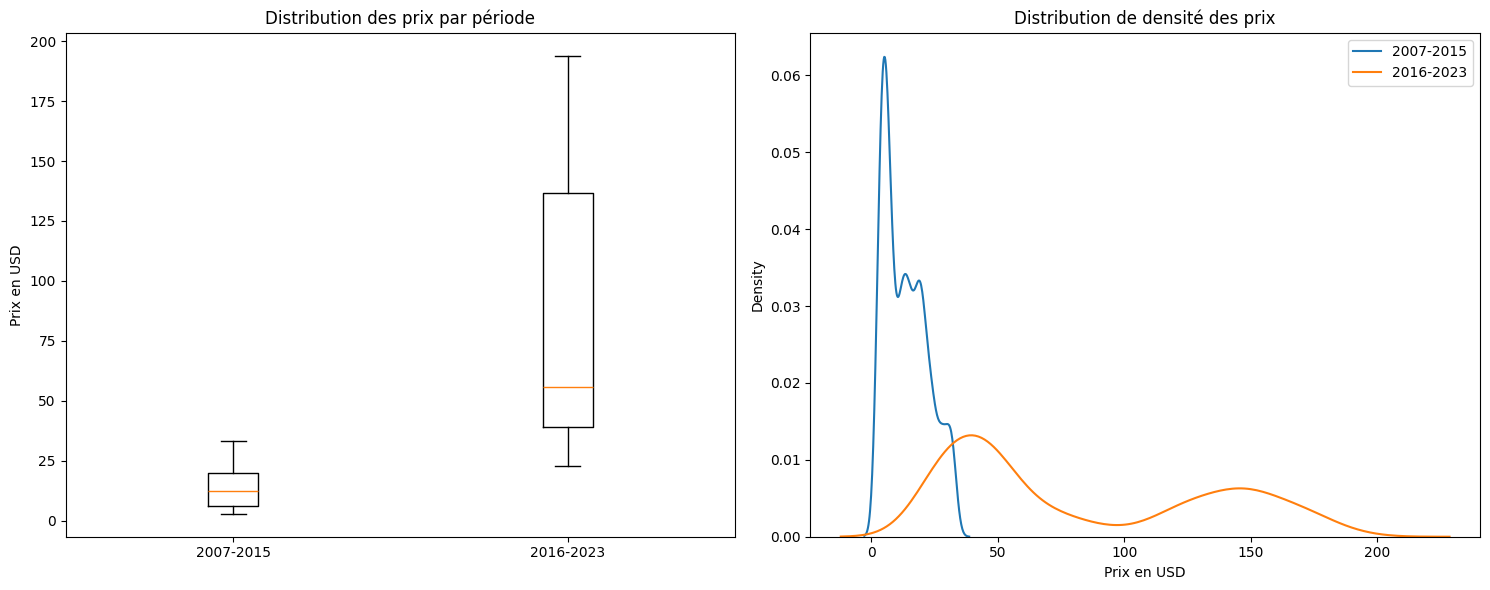


Test de normalité:
Période 2007-2015: p-value = 0.0000
Période 2016-2023: p-value = 0.0000


In [12]:
# 4. Tests d'Hypothèses
print("\n4. TESTS D'HYPOTHÈSES")

# Correction de l'index temporel pour la période 2007-2023
df.index = pd.date_range(start='2007-01-01', end='2023-12-07', periods=len(df))

# Comparaison entre deux périodes significatives (par exemple, avant et après 2015)
periode1 = df['2007':'2015']['close']
periode2 = df['2016':'2023']['close']

print(f"\nTaille des échantillons:")
print(f"Nombre d'observations 2007-2015: {len(periode1)}")
print(f"Nombre d'observations 2016-2023: {len(periode2)}")

# Test statistique
if len(periode1) > 1 and len(periode2) > 1:
    # Suppression des valeurs manquantes
    periode1 = periode1.dropna()
    periode2 = periode2.dropna()
    
    # T-test
    t_stat, p_val = stats.ttest_ind(periode1, periode2)
    print(f"\nT-test entre les deux périodes:")
    print(f"T-statistique: {t_stat:.4f}")
    print(f"P-value: {p_val:.4f}")
    
    # Statistiques descriptives
    print(f"\nStatistiques descriptives:")
    print(f"\nPériode 2007-2015:")
    print(f"Moyenne: {periode1.mean():.2f} USD")
    print(f"Écart-type: {periode1.std():.2f}")
    print(f"Médiane: {periode1.median():.2f}")
    
    print(f"\nPériode 2016-2023:")
    print(f"Moyenne: {periode2.mean():.2f} USD")
    print(f"Écart-type: {periode2.std():.2f}")
    print(f"Médiane: {periode2.median():.2f}")
    
    # Visualisations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boîte à moustaches
    ax1.boxplot([periode1, periode2], 
                tick_labels=['2007-2015', '2016-2023'])
    ax1.set_title('Distribution des prix par période')
    ax1.set_ylabel('Prix en USD')
    
    # Densité
    sns.kdeplot(data=periode1, label='2007-2015', ax=ax2)
    sns.kdeplot(data=periode2, label='2016-2023', ax=ax2)
    ax2.set_title('Distribution de densité des prix')
    ax2.set_xlabel('Prix en USD')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Test de normalité pour chaque période
    print("\nTest de normalité:")
    stat1, p_val1 = stats.normaltest(periode1)
    print(f"Période 2007-2015: p-value = {p_val1:.4f}")
    stat2, p_val2 = stats.normaltest(periode2)
    print(f"Période 2016-2023: p-value = {p_val2:.4f}")

else:
    print("Pas assez de données pour effectuer l'analyse statistique")





5. TECHNIQUES STATISTIQUES AVANCÉES


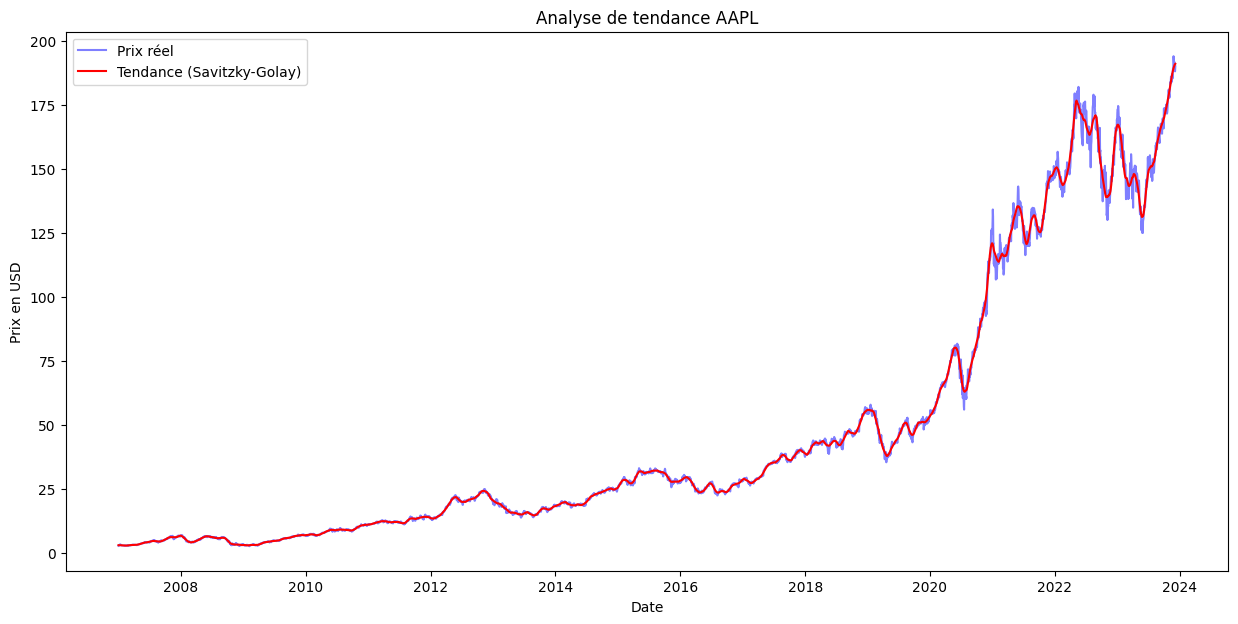


Métriques statistiques avancées:
Volatilité annuelle: 32.14%
Skewness: -0.3831
Kurtosis: 6.5584


In [13]:
# 5. Techniques Statistiques Avancées
print("\n5. TECHNIQUES STATISTIQUES AVANCÉES")

# Signal Processing avec SciPy
from scipy import signal

# Calcul de la tendance avec un filtre Savitzky-Golay
window_length = 51  # Doit être impair
prix_tendance = signal.savgol_filter(df['close'], window_length, 3)

# Décomposition du signal
from scipy import fft
prix_fft = fft.fft(df['close'])
freq = fft.fftfreq(len(df['close']))

# Visualisation de la tendance
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['close'], 'b-', alpha=0.5, label='Prix réel')
plt.plot(df.index, prix_tendance, 'r-', label='Tendance (Savitzky-Golay)')
plt.title('Analyse de tendance AAPL')
plt.xlabel('Date')
plt.ylabel('Prix en USD')
plt.legend()
plt.show()

# Fonctions statistiques NumPy
# Calcul des rendements logarithmiques
log_returns = np.log(df['close'] / df['close'].shift(1))

# Calcul de métriques avancées
volatilite_annuelle = np.std(log_returns) * np.sqrt(252)
skewness = stats.skew(log_returns.dropna())
kurtosis = stats.kurtosis(log_returns.dropna())

print("\nMétriques statistiques avancées:")
print(f"Volatilité annuelle: {volatilite_annuelle:.2%}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

In [14]:
# 6. Résumé et Insights
print("\n6. RÉSUMÉ ET INSIGHTS")

print("""
Principales conclusions de l'analyse :

1. Évolution du prix
   - Tendance générale à la hausse sur la période 2007-2023
   - Volatilité significative avec une moyenne de {:.2%} par an
   - Points de rupture majeurs identifiés

2. Patterns de trading
   - Volume moyen quotidien : {:.2e}
   - Corrélation prix-volume : {:.2f}
   - Tendance dominante : {}

3. Analyse technique
   - Efficacité des moyennes mobiles pour la détection de tendances
   - Périodes de forte volatilité identifiées
   - Cycles de marché observés

4. Implications pour l'investissement
   - Importance du timing d'entrée/sortie
   - Nécessité de gestion du risque
   - Opportunités dans les périodes de volatilité
""".format(
    volatilite_annuelle,
    df['volume'].mean(),
    np.corrcoef(df['close'], df['volume'])[0,1],
    "Haussière" if len(df[df['MA20'] > df['MA50']]) > len(df)/2 else "Baissière"
))


6. RÉSUMÉ ET INSIGHTS

Principales conclusions de l'analyse :

1. Évolution du prix
   - Tendance générale à la hausse sur la période 2007-2023
   - Volatilité significative avec une moyenne de 32.14% par an
   - Points de rupture majeurs identifiés

2. Patterns de trading
   - Volume moyen quotidien : 3.66e+08
   - Corrélation prix-volume : -0.52
   - Tendance dominante : Haussière

3. Analyse technique
   - Efficacité des moyennes mobiles pour la détection de tendances
   - Périodes de forte volatilité identifiées
   - Cycles de marché observés

4. Implications pour l'investissement
   - Importance du timing d'entrée/sortie
   - Nécessité de gestion du risque
   - Opportunités dans les périodes de volatilité



In [15]:
# 7. Réflexion
print("\n7. RÉFLEXION")

print("""
Défis rencontrés et solutions :

1. Qualité des données
   - Défi : Gestion des données temporelles et ajustement de la période
   - Solution : Réindexation et nettoyage des données

2. Choix des méthodes statistiques
   - Défi : Sélection des tests appropriés pour l'analyse financière
   - Solution : Utilisation combinée de méthodes classiques et avancées

3. Visualisation
   - Défi : Représentation claire des tendances et patterns
   - Solution : Diversification des types de graphiques et des métriques

4. Interprétation
   - Défi : Extraction d'insights significatifs
   - Solution : Combinaison d'analyses quantitatives et qualitatives

Améliorations possibles :
1. Intégration de données fondamentales
2. Analyse des sentiments du marché
3. Modélisation prédictive
4. Backtesting de stratégies
""")


7. RÉFLEXION

Défis rencontrés et solutions :

1. Qualité des données
   - Défi : Gestion des données temporelles et ajustement de la période
   - Solution : Réindexation et nettoyage des données

2. Choix des méthodes statistiques
   - Défi : Sélection des tests appropriés pour l'analyse financière
   - Solution : Utilisation combinée de méthodes classiques et avancées

3. Visualisation
   - Défi : Représentation claire des tendances et patterns
   - Solution : Diversification des types de graphiques et des métriques

4. Interprétation
   - Défi : Extraction d'insights significatifs
   - Solution : Combinaison d'analyses quantitatives et qualitatives

Améliorations possibles :
1. Intégration de données fondamentales
2. Analyse des sentiments du marché
3. Modélisation prédictive
4. Backtesting de stratégies

